<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-required-modules" data-toc-modified-id="Loading-required-modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading required modules</a></span></li><li><span><a href="#MNIST-digits-dataset" data-toc-modified-id="MNIST-digits-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MNIST digits dataset</a></span><ul class="toc-item"><li><span><a href="#Downloading-MNIST-dataset" data-toc-modified-id="Downloading-MNIST-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Downloading MNIST dataset</a></span></li><li><span><a href="#Iterating-though-dataset" data-toc-modified-id="Iterating-though-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Iterating though dataset</a></span></li><li><span><a href="#Is-the-training-dataset-balanced?" data-toc-modified-id="Is-the-training-dataset-balanced?-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Is the training dataset balanced?</a></span><ul class="toc-item"><li><span><a href="#Computing-the-frequency-of-each-digit-in-the-training-dataset" data-toc-modified-id="Computing-the-frequency-of-each-digit-in-the-training-dataset-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Computing the frequency of each digit in the training dataset</a></span></li><li><span><a href="#Computing-the-percentages-of-each-digit-in-the-training-dataset" data-toc-modified-id="Computing-the-percentages-of-each-digit-in-the-training-dataset-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Computing the percentages of each digit in the training dataset</a></span></li></ul></li></ul></li><li><span><a href="#CFAR10-dataset" data-toc-modified-id="CFAR10-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>CFAR10 dataset</a></span><ul class="toc-item"><li><span><a href="#Downloading-CIFAR10-dataset" data-toc-modified-id="Downloading-CIFAR10-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Downloading CIFAR10 dataset</a></span></li><li><span><a href="#Iterating-through-dataset" data-toc-modified-id="Iterating-through-dataset-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Iterating through dataset</a></span></li><li><span><a href="#Changing-the-batch_size-and-shuffle" data-toc-modified-id="Changing-the-batch_size-and-shuffle-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Changing the batch_size and shuffle</a></span></li></ul></li></ul></div>

# Loading required modules

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt #To display images

# MNIST digits dataset

## Downloading MNIST dataset

In [15]:
trainMNIST = datasets.MNIST("",  #Folder where the dataset to be stored; empty means stored in current folder
    train=True,  #Download the 'training' dataset, False => download 'test' dataset
    download=True,  #Should be 'True' in the first time downling the dataset, else 'False'
    transform=transforms.Compose([transforms.ToTensor()]))  #Transform the data to tensors
testMNIST = datasets.MNIST(
    "",  #Load from the current folder
    train=False,  #Downloading/loading 'test' dataset
    download=True,  #Downloading if it is not in the current folder
    transform=transforms.Compose([transforms.ToTensor()]))  #Transform to tensors

In [18]:
trainMNISTLoader = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testMNISTLoader  = torch.utils.data.DataLoader(test,  batch_size=10, shuffle=True)

print("Batch size - Training dataset = ", trainMNISTLoader.batch_size)
print("Batch size - Test dataset     = ", testMNISTLoader.batch_size)

Batch size - Training dataset =  10
Batch size - Test dataset     =  10


## Iterating though dataset

In [19]:
for data in trainMNISTLoader:
    print(data) #Prints the first batch
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [5]:
image1, label1 = data[0][0], data[1][0] #data[i][j] - i=0 => images, i=1 => labels; j = example number
print(image1.shape) #1st dimension - no of channels, other two dimensions - image's height and width
print(label1)

torch.Size([1, 28, 28])
tensor(7)


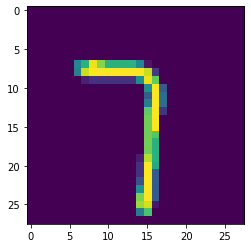

In [6]:
plt.imshow(image1.view(28,28)) #Reshaping the (1, 28, 28) matrix to (28,28) matrix that can be displayed by maxplotlib - Refer Lesson 02 - Tensor Basics

In [7]:
new_image1 = image1.view(-1) #Flatten the image to a 1D tensor; in case vanilla neural network we can send the input as a 1D tensor
print(new_image1.shape)

torch.Size([784])


## Is the training dataset balanced?

### Computing the frequency of each digit in the training dataset

In [8]:
total = 0
count_dictionary = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset: #Counting how many times each digit is in the training dataset
    Xs, ys = data #Labels are in ys
    for y in ys: #Iterate through each label (digit)
        count_dictionary[int(y)] += 1
        total += 1
        
print("Count of each digit => ", count_dictionary)
print("Total number of digits in the MNIST training dataset = ", total)

Count of each digit =>  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Total number of digits in the MNIST training dataset =  60000


### Computing the percentages of each digit in the training dataset

In [9]:
percentage_dictionary = {0:0.0, 1:0.0, 2:0.0, 3:0.0, 4:0.0, 5:0.0, 6:0.0, 7:0.0, 8:0.0, 9:0.0}

for i in count_dictionary:
    percentage_dictionary[i] = count_dictionary[i]/total * 100
    print(i, "=>", "{:6.2f}".format(percentage_dictionary[i]), "%")

0 =>   9.87 %
1 =>  11.24 %
2 =>   9.93 %
3 =>  10.22 %
4 =>   9.74 %
5 =>   9.04 %
6 =>   9.86 %
7 =>  10.44 %
8 =>   9.75 %
9 =>   9.92 %


# CFAR10 dataset

## Downloading CIFAR10 dataset

In [10]:
trainCFAR10 = datasets.CIFAR10("",
                               train=True,
                               download=False,
                               transform=transforms.Compose(
                                   [transforms.ToTensor()]))

testCFAR10 = datasets.CIFAR10("",
                               train=False,
                               download=False,
                               transform=transforms.Compose(
                                   [transforms.ToTensor()]))

In [11]:
type(trainCFAR10)

torchvision.datasets.cifar.CIFAR10

## Iterating through dataset

In [60]:
trainCFAR10Loader = torch.utils.data.DataLoader(trainCFAR10)
print("Batch size - training dataset = ", trainCFAR10Loader.batch_size)

data_itr = iter(trainCFAR10Loader) #Creates a data iterator for trainCFAR10Loader
print("Data iterator = ", data_itr)

images, labels = data_itr.next() #Gets the first batch
print("Size of images", images.shape) #1 - batch size, 3 - no of chanells, last two dimensions - height and width of images
print("Labels tensor = ", labels) #Only 1 label is in the tensor since the batch size is 1

for itr in data_itr: #Iterate through the whole dataset, takes 1 batch at a time
    images, labels = itr #Stores images and the corresponding labels in images and labels
    print("Size of images", images.shape)
    print("Labels tensor = ", labels)
    break #Sould be removed to iterate though whole dataset

Batch size - training dataset =  1
Data iterator =  <torch.utils.data.dataloader._SingleProcessDataLoaderIter object at 0x7fd45fc1fe50>
Size of images torch.Size([1, 3, 32, 32])
Labels tensor =  tensor([6])
Size of images torch.Size([1, 3, 32, 32])
Labels tensor =  tensor([9])


In [27]:
for data in trainCFAR10Loader:
    print(data) #Prints the first batch
    break

[tensor([[[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ..., 

## Changing the batch_size and shuffle

In [64]:
trainCFAR10Loader = torch.utils.data.DataLoader(trainCFAR10, batch_size=8, shuffle=True)
data_itr = iter(trainCFAR10Loader)
images, labels = data_itr.next()
print("Size of images", images.shape) #8 - batch size, 3 - no of chanells, last two dimensions - height and width of images
print("Labels tensor = ", labels) #8 labels since the batch_size is 8

Size of images torch.Size([8, 3, 32, 32])
Labels tensor =  tensor([1, 7, 8, 0, 1, 4, 0, 3])
